In [272]:
import numpy as np
from matplotlib import pyplot as pylt     
import time as t
import sys 
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

In [273]:
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline  

# A. 1D Linear Convection

In [274]:
nx = 41 # total number of points
dx = 2 / (nx-1) # dist between consecutive poibts 
nt = 25    # number of timesteps we want to calculate
dt = .025  # time for each step
c = 1      # assume wavespeed of c = 1

# Intial condition: 
Define an evenly spaced grid of points: x ∈ (0,2) <br>
u = 2       (0.5 ≤ x ≤1) <br>
u = 1 everywhere else in (0,2)

In [323]:
un =np.ones(nx) # define an array with 1
un[int(.5 / dx):int(1 / dx + 1)] = 2  # Intial condition

In [324]:
print(un)

[1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]


In [329]:
len(un)

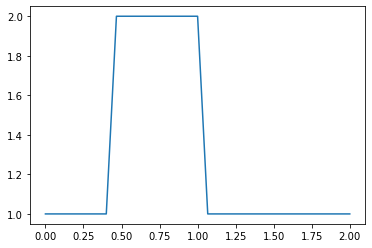

In [330]:
pylt.plot(np.linspace(0,2,nx),un)

# Discretization Equation for each x

In [334]:
un=np.ones(nx)

for n in range(nt):
    un = u.copy()
    for i in range(1,nx):
        u[i] = un[i] - c * dt/dx * (un[i] -un[i-1])

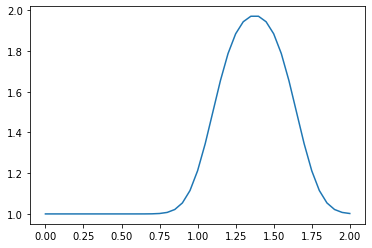

In [279]:
pylt.plot(np.linspace(0,2,nx),u)

# 2D Linear Convection 

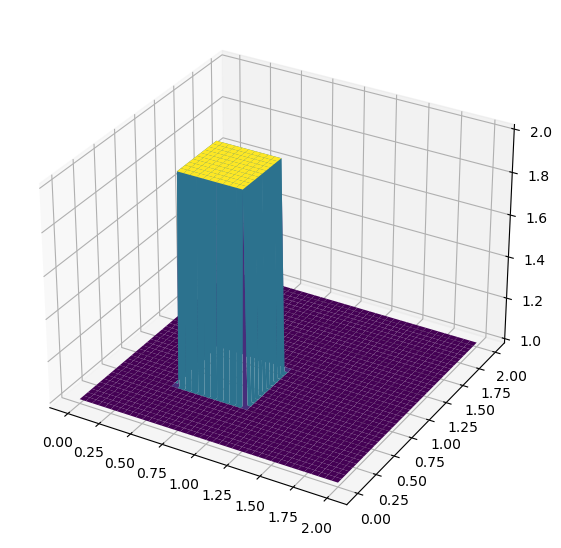

In [280]:
###variable declarations
nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx)) ##create a 1xn vector of 1's
un = np.ones((ny, nx)) ##

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

###Plot Initial Condition
##the figsize parameter can be used to produce different sized images
fig = pylt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

In [282]:
fig.savefig('2D_Convection')

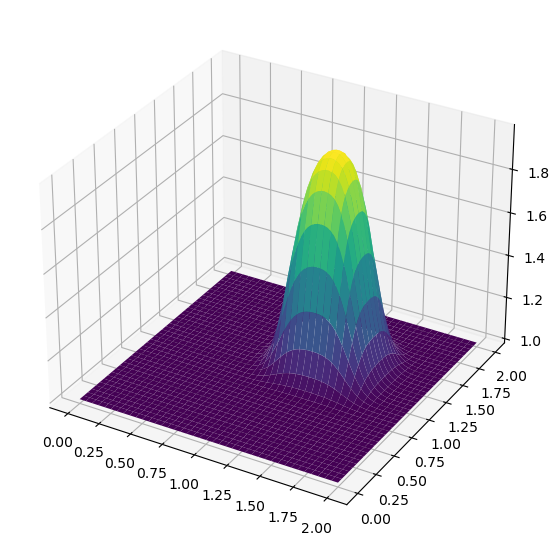

In [283]:
u = np.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    row, col = u.shape
    for j in range(1, row):
        for i in range(1, col):
            u[j, i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i - 1])) -
                                  (c * dt / dy * (un[j, i] - un[j - 1, i])))
            u[0, :] = 1
            u[-1, :] = 1
            u[:, 0] = 1
            u[:, -1] = 1

fig = pylt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

In [284]:
fig.savefig('2D_Convection')

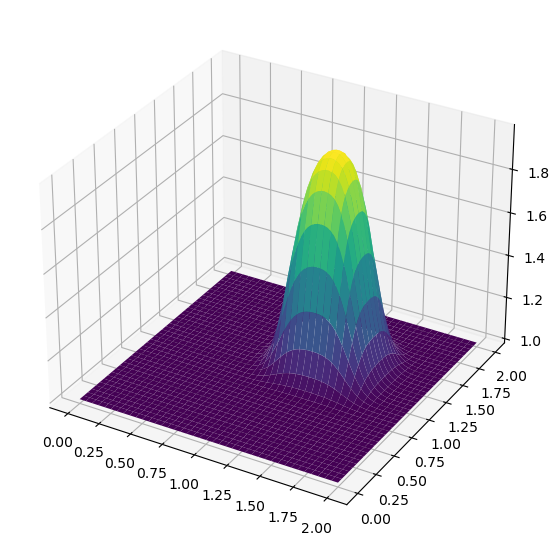

In [198]:
u = np.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                              (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

fig = pylt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)


# B. Non-Linear Convection

In [285]:
nx = 41 # total number of points
dx = 2 / (nx-1) # dist between consecutive poibts 
nt = 25    # number of timesteps we want to calculate
dt = .025  # time for each step
u =np.ones(nx)
u[int(.5 / dx):int(1 / dx + 1)] = 2
un = np.ones(nx)

for n in range(nt):
    un = u.copy()
    for i in range(1,nx):
        u[i] = un[i] - un[i] * dt/dx * (un[i] -un[i-1])

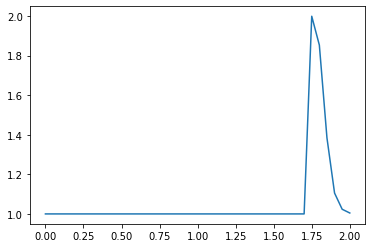

In [289]:
fig = pylt.plot(np.linspace(0,2,nx),u)

In [290]:
fig.savefig('1D_nConvection')

AttributeError: 'list' object has no attribute 'savefig'

# 2D Non-Linear Convection

In [291]:
nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx)) ##create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))

###Assign initial conditions
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

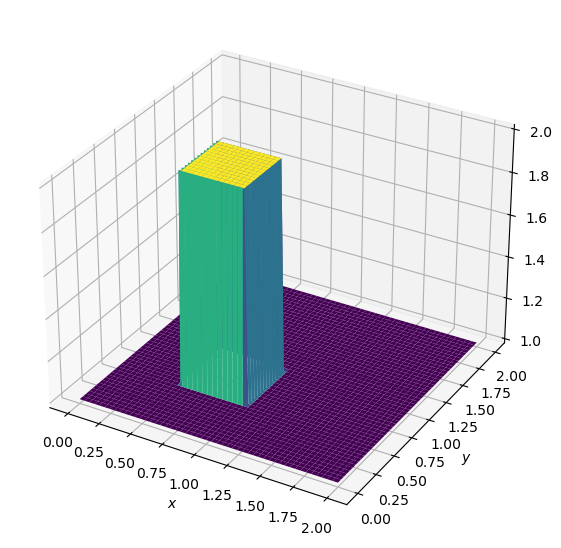

In [292]:
fig = pylt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [293]:
fig.savefig('2D_nConvection')

In [294]:
for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = (un[1:, 1:] - 
                 (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                  vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
    v[1:, 1:] = (vn[1:, 1:] -
                 (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) -
                 vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))
    
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

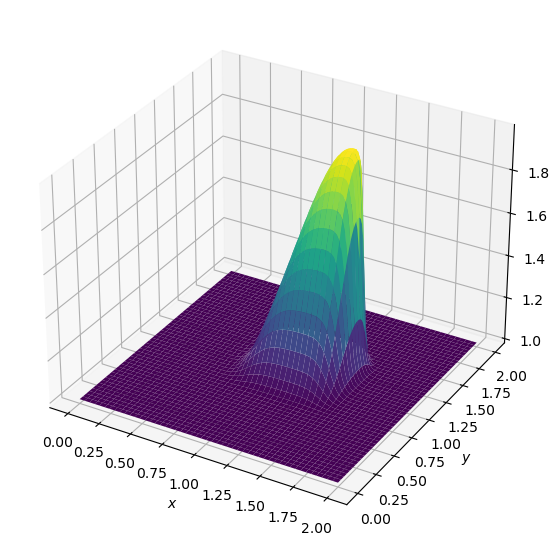

In [295]:
fig = pylt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

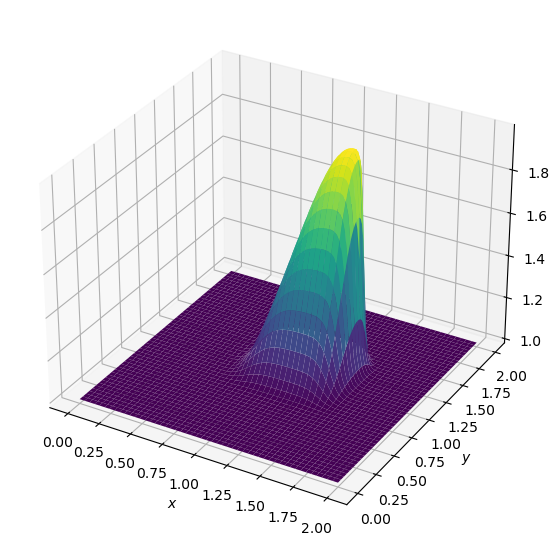

In [296]:
fig = pylt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [297]:
fig.savefig('2D_nConvection')

# C. Diffusion Equation in 1D

In [205]:
nx = 41 # total number of points
dx = 2 / (nx-1) # dist between consecutive poibts 
nt = 25    # number of timesteps we want to calculate
dt = .025  # time for each step
u[int(.5 / dx):int(1 / dx + 1)] = 2
un = np.ones(nx)

nu = 0.3 # viscosity
sigma = .2
dt = sigma*dx**2

In [206]:
u = np.ones(nx)
u[int(.5 / dx):int(1 / dx + 1)] = 2
un = np.ones(nx)

for n in range(nt): 
    un = u.copy() 
    for i in range(1, nx - 1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])

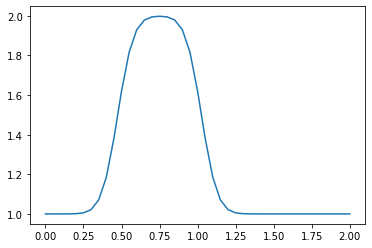

In [207]:
pylt.plot(np.linspace(0, 2, nx), u);

# Diffusion in 2D 

In [298]:
###variable declarations
nx = 31
ny = 31
nt = 17
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx)) 
un = np.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  

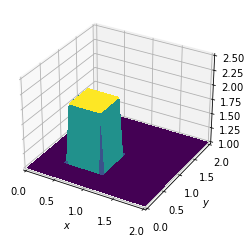

In [299]:
fig = pylt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [300]:
###Run through nt timesteps
def diffusion2D(mesh_size_x, mesh_size_y, time):
    nu = 0.05
    dx = 2.0/(mesh_size_x-1)
    dy = 2.0/(mesh_size_y-1)
    sigma = 0.25
    dt = sigma*dx*dy/nu
    timesteps = int(time/dt)
    
    x = np.linspace(0, 2, mesh_size_x)
    y = np.linspace(0, 2, mesh_size_y)

    u = np.ones((timesteps, mesh_size_x, mesh_size_y))
    
    # Initial conditions
    u[0, int(.5/dx):int(1/dx + 1),int(.5/dy):int(1/dy + 1)] = 2
    
    # Boundary conditions
    u[1:, 0,:] = 1
    u[1:, -1,:] = 1
    u[1:, :,0] = 1
    u[1:, :,-1] = 1
    
    lambda_x = nu*dt/dx**2
    lambda_y = nu*dt/dy**2
    for n in range(timesteps-1):
        u[n+1, 1:-1,1:-1] = (u[n, 1:-1, 1:-1]
                           + lambda_x*(u[n, 2:, 1:-1] - 2*u[n, 1:-1,1:-1] + u[n, :-2, 1:-1]) 
                           + lambda_y*(u[n, 1:-1, 2:] - 2*u[n, 1:-1, 1:-1] + u[n, 1:-1, :-2]))
        
    return x, y, u
pos_x, pos_y, vel_x = diffusion2D(31, 31, 0.5)

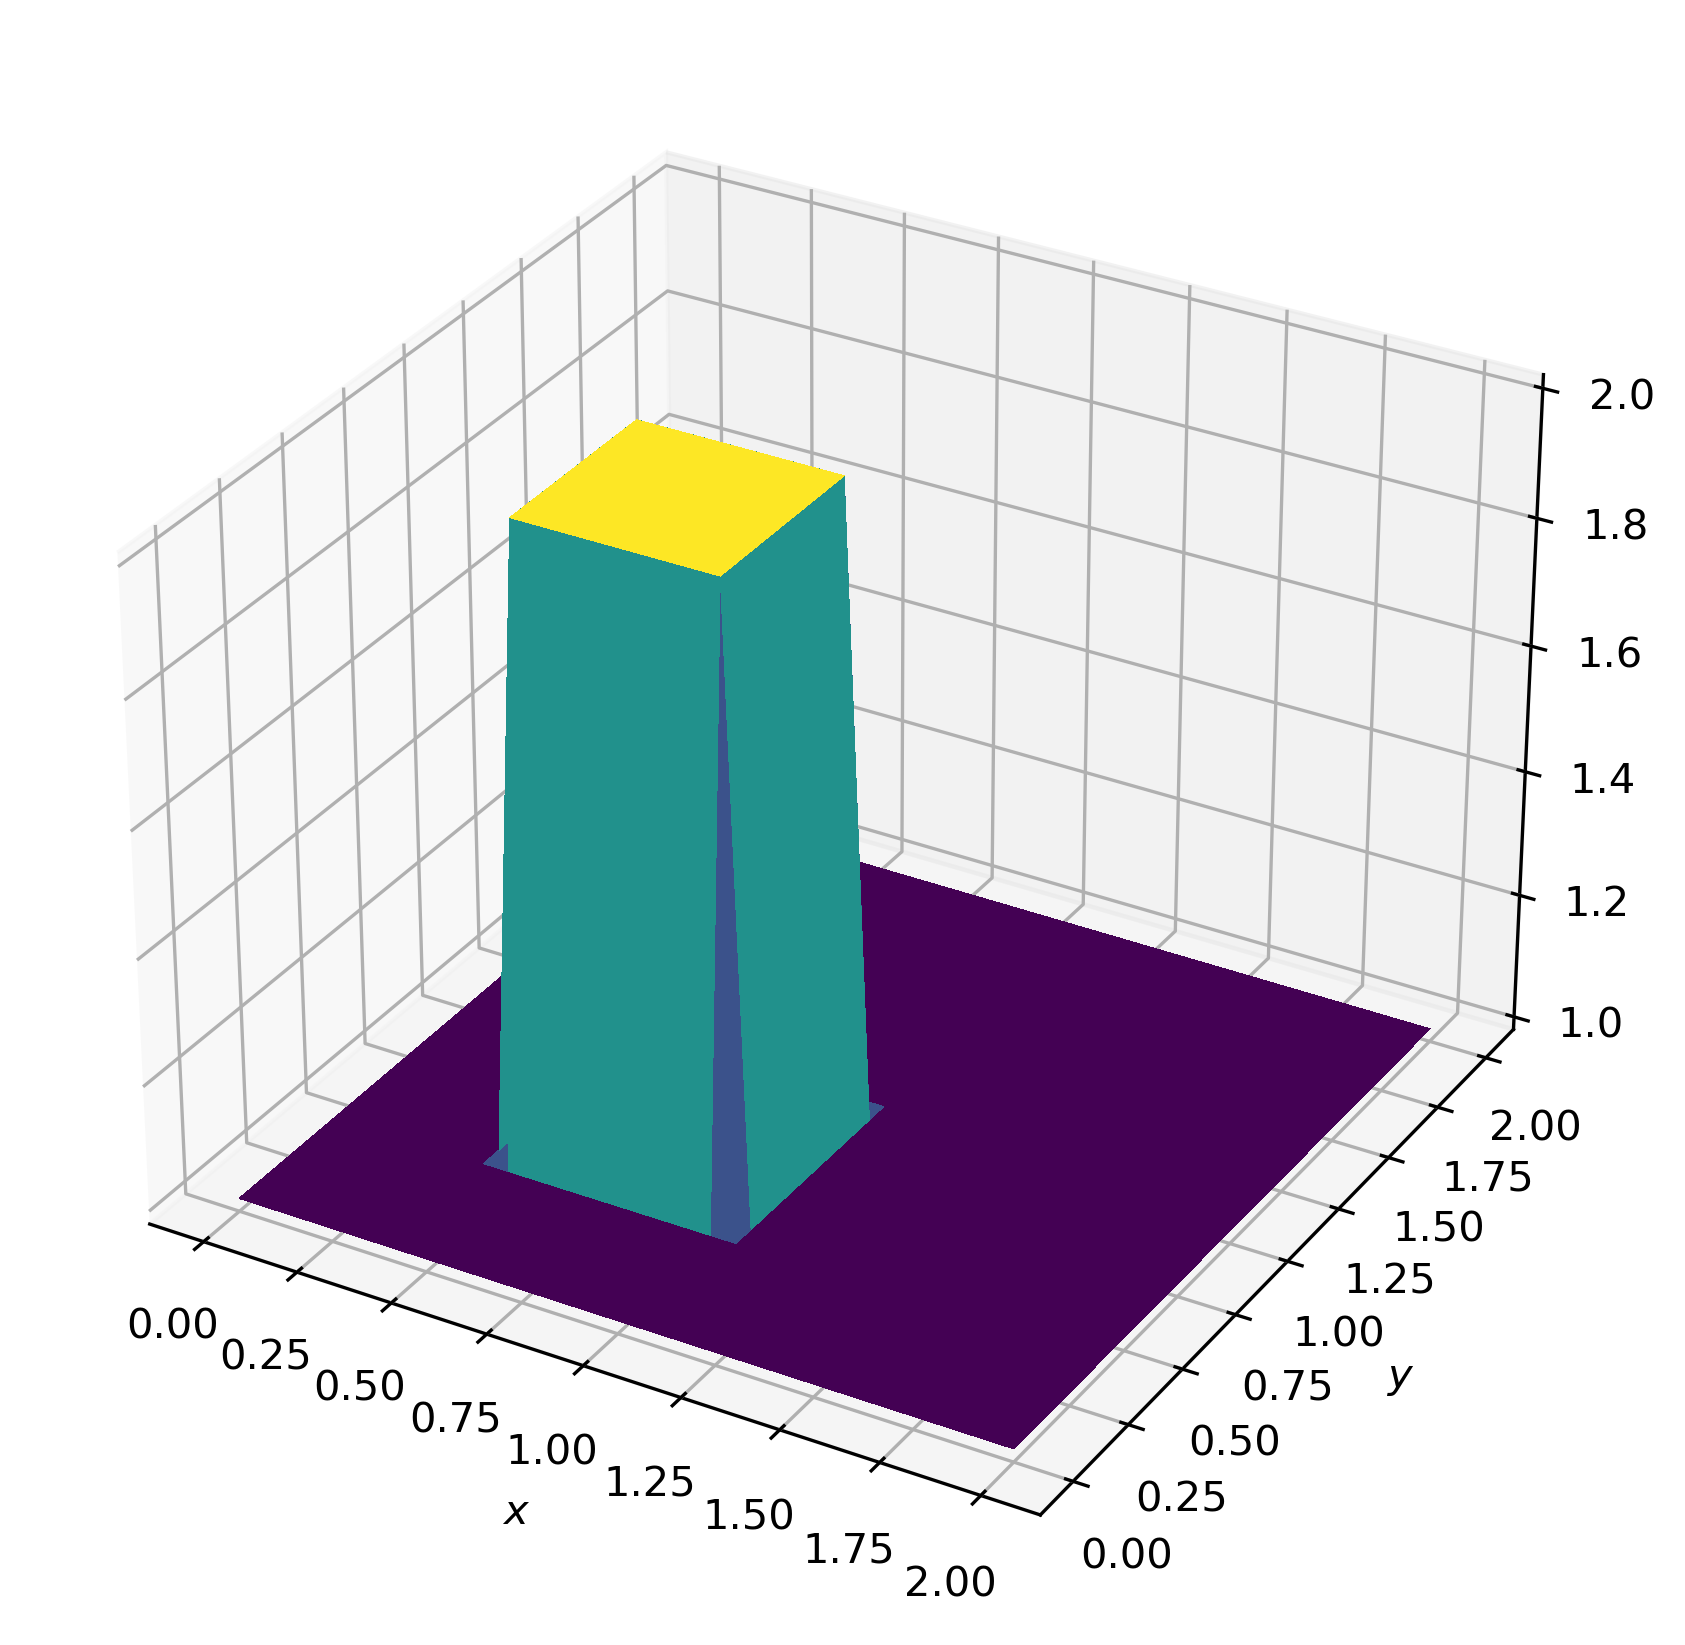

In [301]:
fig = pylt.figure(1, figsize=(9, 7), dpi=300)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(pos_x, pos_y)
surf = ax.plot_surface(X, Y, np.transpose(vel_x[0]), rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
pylt.show()

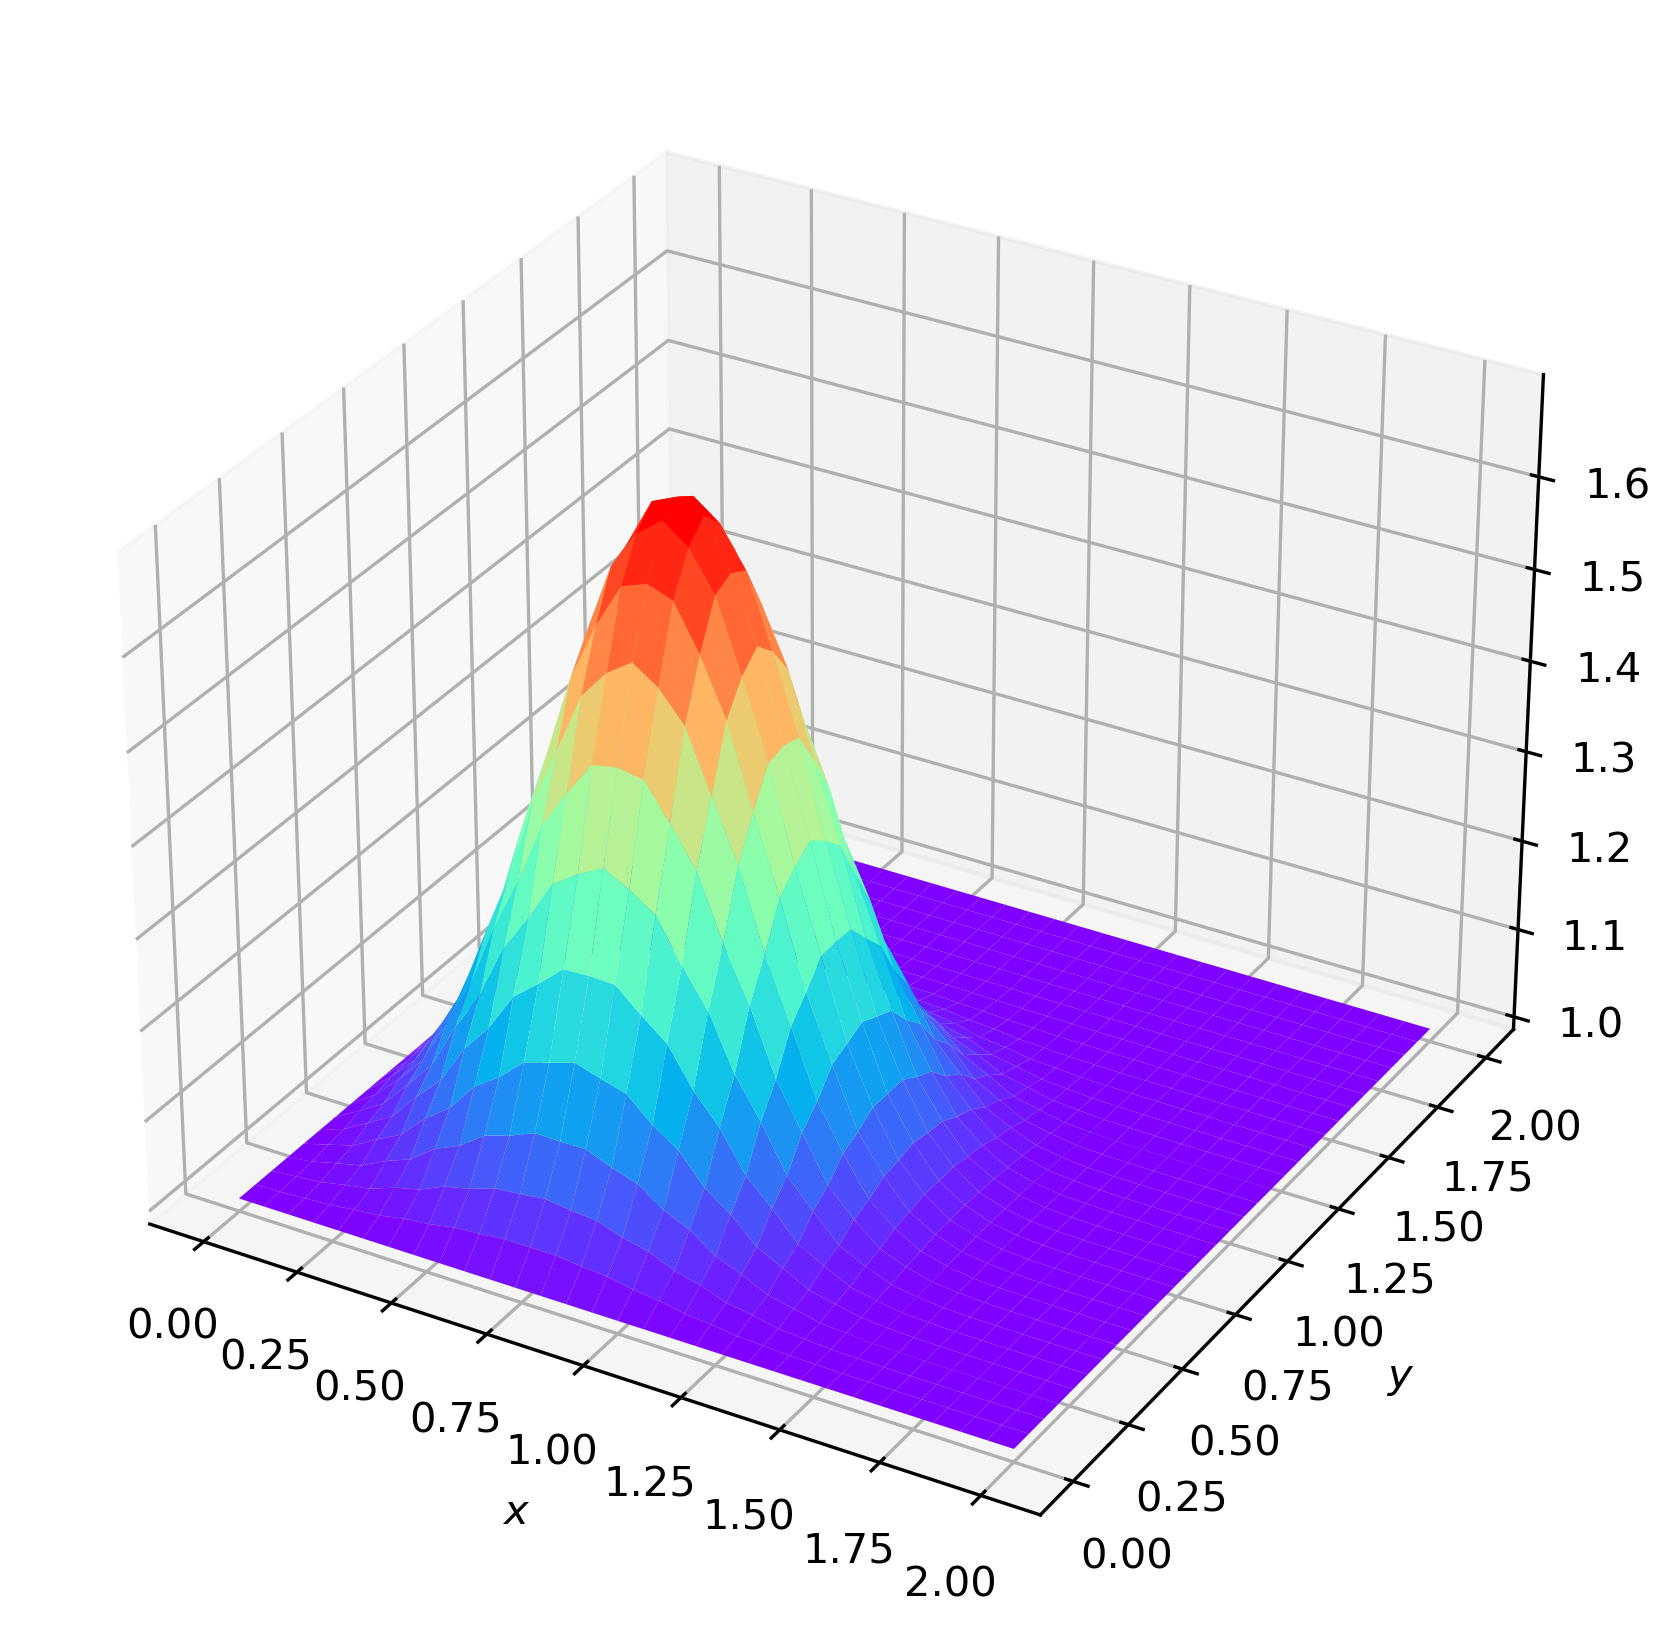

In [302]:
fig2 = pylt.figure(2, figsize=(9, 7), dpi=300)
ax = fig2.gca(projection='3d')
X, Y = np.meshgrid(pos_x, pos_y)
surf2 = ax.plot_surface(X, Y, np.transpose(vel_x[-1]), rstride=1, cstride=1, cmap=cm.rainbow, linewidth=0, antialiased=True)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
pylt.show()

In [303]:
fig2.savefig('2D_Diffusion')

# D. Burgers' Equation 
(non-linear convection + diffusion)

In [304]:
import sympy as sp
from sympy import init_printing
init_printing(use_latex=True) #use Latex

# Initial Condition setup

In [305]:
x, nu, t = sp.symbols('x nu t')
phi = (sp.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sp.exp(-(x - 4 * t - 2 * sp.pi)**2 / (4 * nu * (t + 1))))
phi

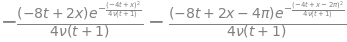

In [306]:
phiprime = phi.diff(x)
phiprime

In [307]:
from sympy.utilities.lambdify import lambdify
#(lambdify converts SymPy symbolic equation into a callable function.)
u = -2 * nu * (phiprime / phi) + 4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [308]:
ufunc = lambdify((t, x, nu), u)
print(ufunc(1, 4, 3))

3.49170664206445


In [309]:
nx = 101
nt = 100
dx = 2 * np.pi / (nx - 1)
nu = .07
dt = dx * nu
x = np.linspace(0, 2*np.pi,nx)
un = np.empty(nx)
t = 0
u = np.asarray([ufunc(t, x0, nu) for x0 in x])

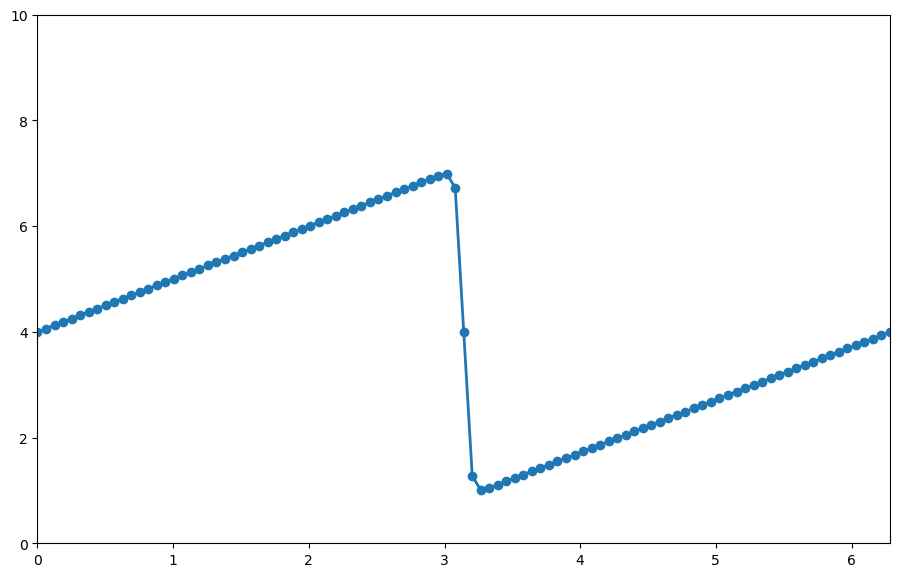

In [310]:
pylt.figure(figsize=(11, 7), dpi=100)
pylt.plot(x, u, marker='o', lw=2)
pylt.xlim([0, 2 * np.pi])
pylt.ylim([0, 10]);

In [311]:
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *\
                (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
        
u_analytical = np.asarray([ufunc(nt * dt, xi, nu) for xi in x])

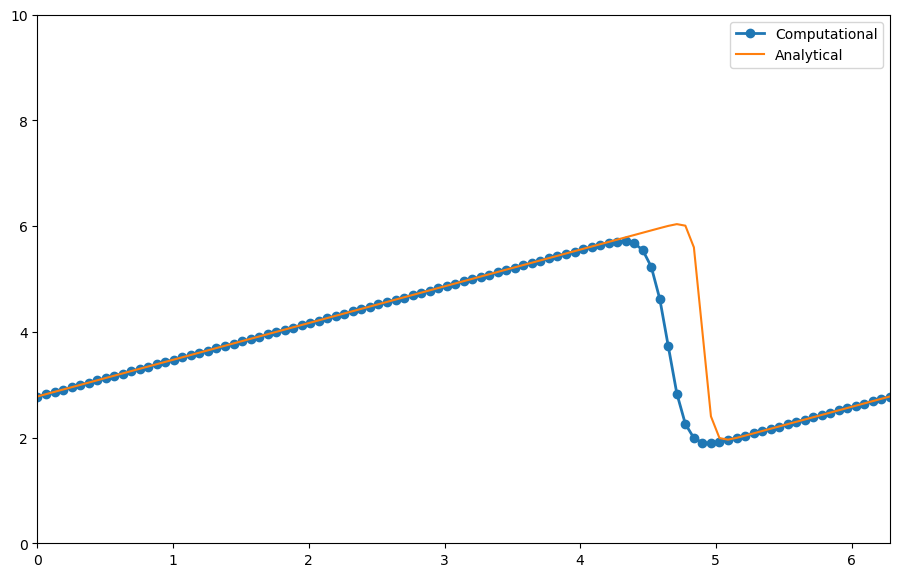

In [313]:
fig2 = pylt.figure(figsize=(11, 7), dpi=100)
pylt.plot(x,u, marker='o', lw=2, label='Computational')
pylt.plot(x, u_analytical, label='Analytical')
pylt.xlim([0, 2 * np.pi])
pylt.ylim([0, 10])
pylt.legend();

In [314]:
fig2.savefig('Burgers1')

# E. 2D Laplace equation

In [315]:
def plot2D(x, y, p):
    fig = pylt.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

In [316]:
def laplace2d(p, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = np.empty_like(p)

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                         dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                        (2 * (dx**2 + dy**2)))
        #boundary conditions
        p[:, 0] = 0  # p = 0 @ x = 0
        p[:, -1] = y  # p = y @ x = 2
        p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
        p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1
        l1norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])) /
                np.sum(np.abs(pn[:])))
    return p

In [317]:
nx = 31
ny = 31
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

p = np.zeros((ny, nx))

#plotting 
x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny)

#boundary conditions
p[:, 0] = 0  # p = 0 @ x = 0
p[:, -1] = y  # p = y @ x = 2
p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1

<Figure size 1100x700 with 0 Axes>

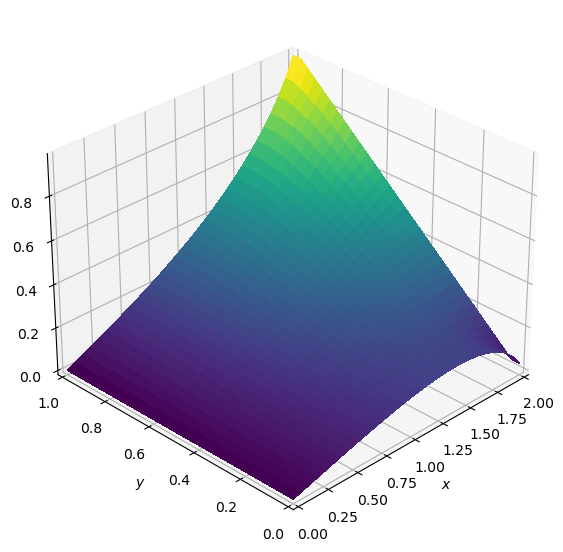

In [321]:
fig2 = pylt.figure(figsize=(11, 7), dpi=100)
plot2D(x, y, p)

In [322]:
fig2.savefig('Laplacian')

In [319]:
p = laplace2d(p, y, dx, dy, 1e-4)

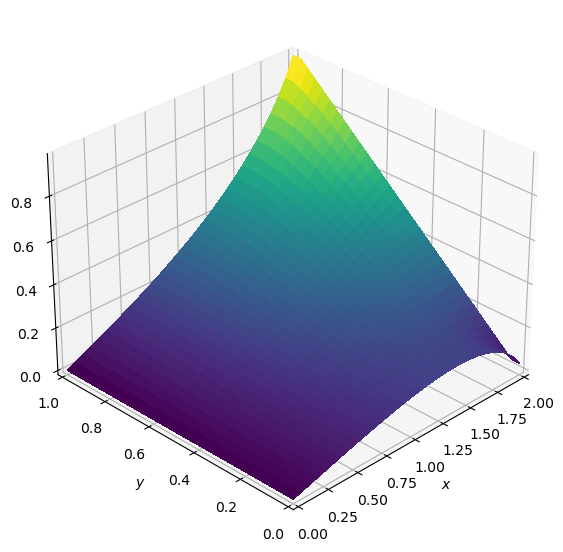

In [320]:
plot2D(x, y, p)

# F. 2D Poisson Equation
(Laplace equation with a constant)

In [230]:
# Parameters
nx = 50
ny = 50
nt  = 100
xmin = 0
xmax = 2
ymin = 0
ymax = 1

dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)

# Initialization
p  = np.zeros((ny, nx))
pd = np.zeros((ny, nx))
b  = np.zeros((ny, nx))
x  = np.linspace(xmin, xmax, nx)
y  = np.linspace(xmin, xmax, ny)

# Source
b[int(ny / 4), int(nx / 4)]  = 100
b[int(3 * ny / 4), int(3 * nx / 4)] = -100

In [231]:
for it in range(nt):
    pd = p.copy()
    p[1:-1,1:-1] = (((pd[1:-1, 2:] + pd[1:-1, :-2]) * dy**2 + (pd[2:, 1:-1] + pd[:-2, 1:-1]) * dx**2 - 
                     b[1:-1, 1:-1] * dx**2 * dy**2) / (2 * (dx**2 + dy**2)))
    p[0, :] = 0
    p[ny-1, :] = 0
    p[:, 0] = 0
    p[:, nx-1] = 0

In [232]:
def plot2D(x, y, p):
    fig = pylt.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

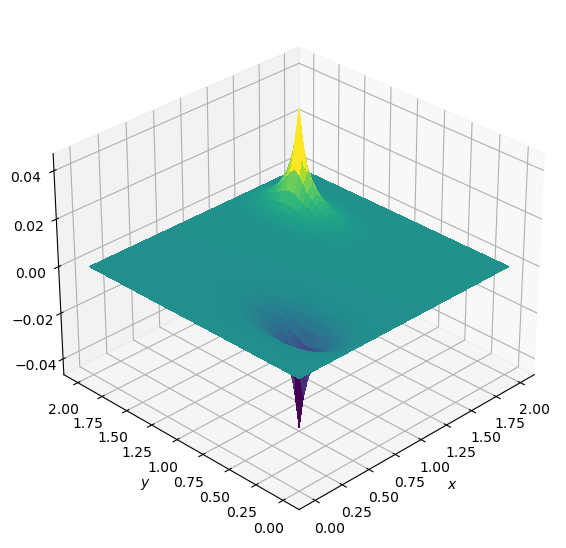

In [233]:
plot2D(x, y, p)

# G. Cavity flow

In [234]:
nx = 41
ny = 41
nt = 500
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

In [235]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    b[1:-1, 1:-1] = (rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -  2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                 (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))- ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
    return b

In [236]:
def pressure_poisson(p, dx, dy, b):
    pn = np.empty_like(p)
    pn = p.copy()
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) - dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1,1:-1])
        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0        # p = 0 at y = 2
    return p

In [237]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-un[1:-1, 1:-1] * dt / dx *(un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *(un[1:-1, 1:-1] - un[0:-2, 1:-1]) - dt / (2 * rho * dx) * (p[1:-1, 2:] - 
                        p[1:-1, 0:-2]) + nu * (dt / dx**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] - un[1:-1, 1:-1] * dt / dx * (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy * (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) - dt / (2 * rho * dy) * (p[2:, 1:-1] 
                        - p[0:-2, 1:-1]) + nu * (dt / dx**2 *   (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 * (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))
        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        u[-1, :] = 1    # set velocity on cavity lid equal to 1
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0
    return u, v, p

In [238]:
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))
nt = 100
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

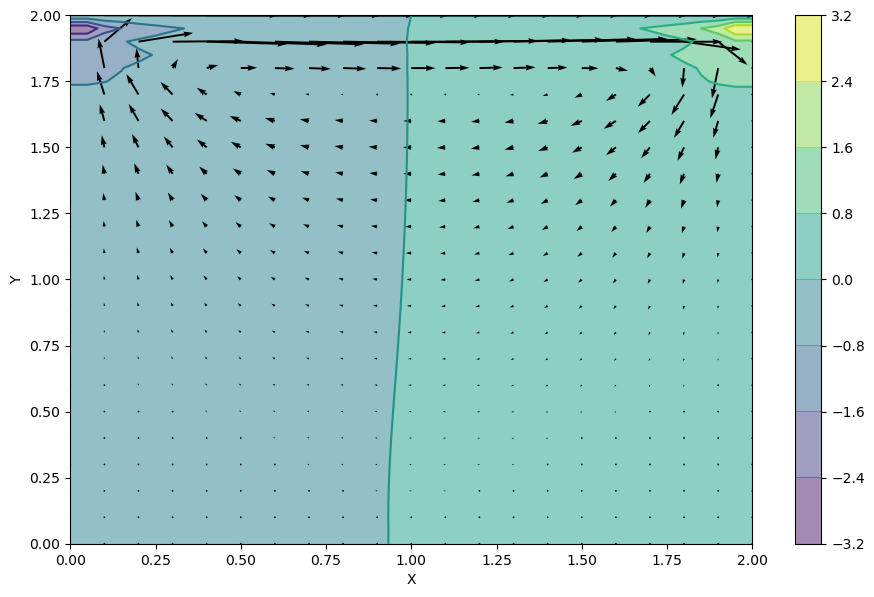

In [240]:
fig = pylt.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pylt.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)  
pylt.colorbar()
# plotting the pressure field outlines
pylt.contour(X, Y, p, cmap=cm.viridis)  
# plotting velocity field
pylt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
pylt.xlabel('X')
pylt.ylabel('Y');

In [241]:
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))
nt = 700
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

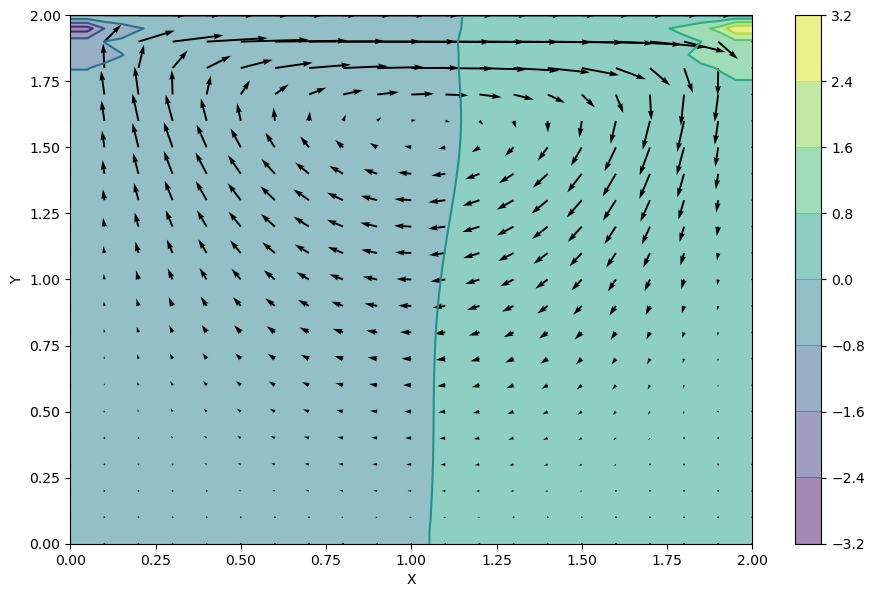

In [242]:
fig = pylt.figure(figsize=(11, 7), dpi=100)
pylt.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pylt.colorbar()
pylt.contour(X, Y, p, cmap=cm.viridis)
pylt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2])
pylt.xlabel('X')
pylt.ylabel('Y');

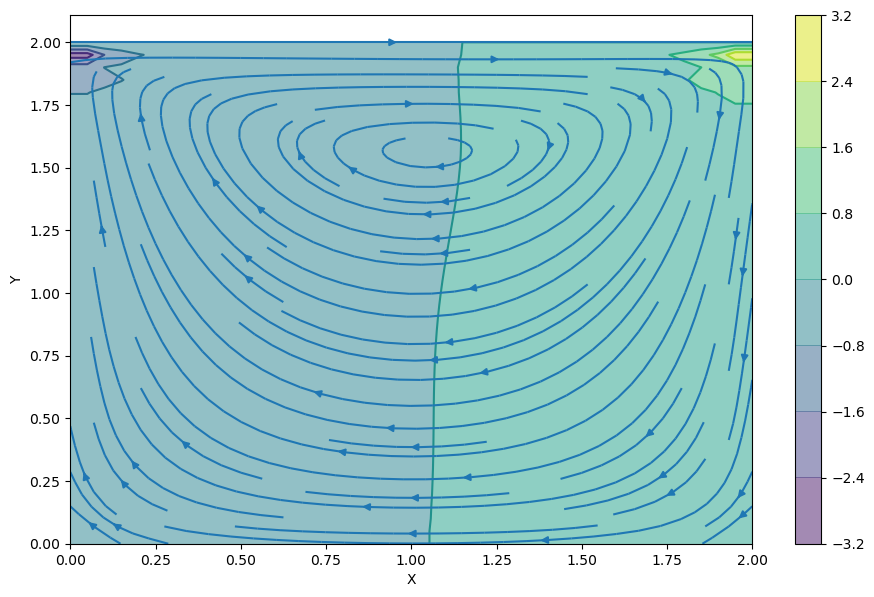

In [243]:
fig = pylt.figure(figsize=(11, 7), dpi=100)
pylt.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pylt.colorbar()
pylt.contour(X, Y, p, cmap=cm.viridis)
pylt.streamplot(X, Y, u, v)
pylt.xlabel('X')
pylt.ylabel('Y');